In [2]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
# Using this to figure out what directory the dataset is in.
os.getcwd()

'/Users/j/Desktop/Capstone_Two'

In [4]:
# This line reads the dataset csv file into a pandas dataframe.
df = pd.read_csv('/Users/j/Desktop/Capstone_Two/adult.data',header=None)

In [5]:
# A brief examination of the data.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Renaming the columns so that their names are more descriptive and clear:
df.columns = ['age','workclass','fnlwgt','education','educationnum','maritalstatus','occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','income']

In [7]:
# Examining the result of renaming the columns.
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


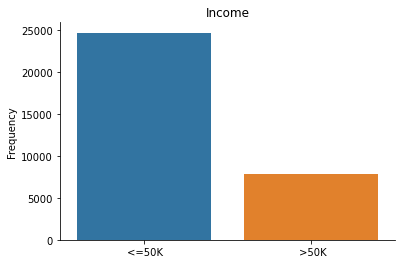

In [8]:
# Since the income column is the column that we want to predict, and is thus one of the most important columns,
# it seems useful to create a count plot of this column just to get a sense of what its values are.
sns.countplot(data=df,
              x='income')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Income')
sns.despine()
plt.show()

In [9]:
# This operation below displays some of the counts of how many members in the dataset had a given age. It is possible
# that age could play a role in predicting income, and it is useful to know if some ages are far more common than 
# others.
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [10]:
# This converts the categorical data in the income column to boolean data, which may make analysis easier.
df['income_bool'] = df.income.apply(lambda x: True if x == ' >50K' else False)

In [11]:
# These following two lines show how different columns vary by age. Looking at this may help explain how increased age
# could influence income.
df2 = df.groupby('age').mean()

In [12]:
df2.head()

,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,income_bool
age,,,,,,
17,185722.232911,6.648101,109.691139,41.751899,21.367089,0.000000
18,193530.207273,8.152727,102.058182,44.336364,25.912727,0.000000
19,204803.543539,9.096910,92.092697,43.915730,30.678371,0.002809
20,198537.705179,9.345286,82.786189,33.298805,32.280212,0.000000
21,200116.997222,9.434722,204.625000,51.636111,34.034722,0.004167


In [13]:
# This gives all the ages in our data:
df2.index

Int64Index([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 90],
           dtype='int64', name='age')

In [14]:
df2.index[1]

18

In [15]:
df2.index[0]

17

In [16]:
df2 = df2.reset_index()

In [17]:
df2.index

RangeIndex(start=0, stop=73, step=1)

In [18]:
# This creates a new variable showing the % of people earning over 50k at each age.
df2['income_bool_pct'] = df2['income_bool'] * 100

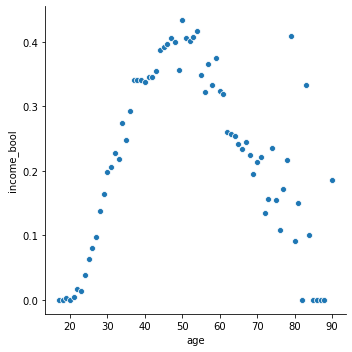

In [19]:
sns.relplot(x='age',y='income_bool',kind='scatter',data=df2)

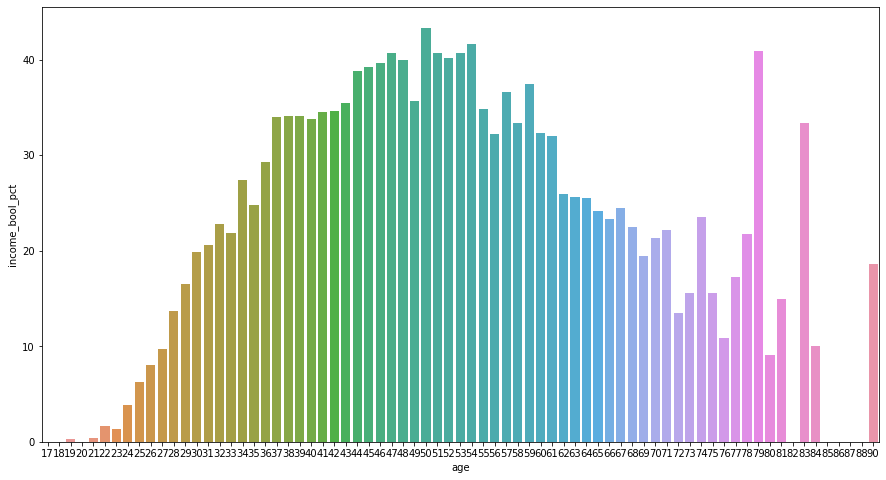

In [20]:
# In our examination of how the variable 'age' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='age',y='income_bool_pct',data=df2)

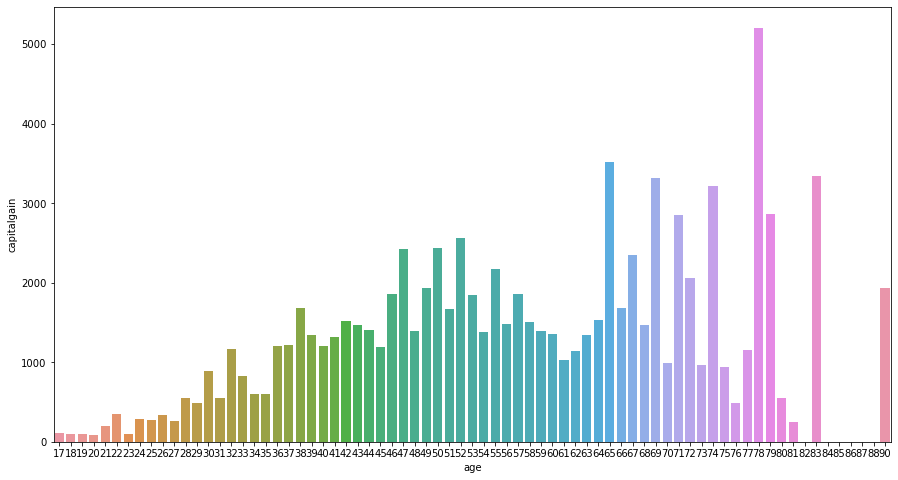

In [21]:
# Looking at explanatory variables more-specifically capitalgain.
plt.figure(figsize=(15,8))
sns.barplot(df2['age'],df2['capitalgain'])

In [22]:
# We can see that the capital gain plot vs age is very similar to the income plot vs age. Perhaps this indicates
# that capital gain would be a very good predictor of income.

In [23]:
capitalgain_info = df['capitalgain'].value_counts()
print(capitalgain_info)

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalgain, Length: 119, dtype: int64


In [24]:
# This creates a new variable in df showing the % of people earning over 50k at each age.
df['income_bool_pct'] = df['income_bool'] * 100

In [25]:
# The barplot below shows the distribution of income_bool_pct by education. This could be useful in elucidating the 
# relationship between education and income.

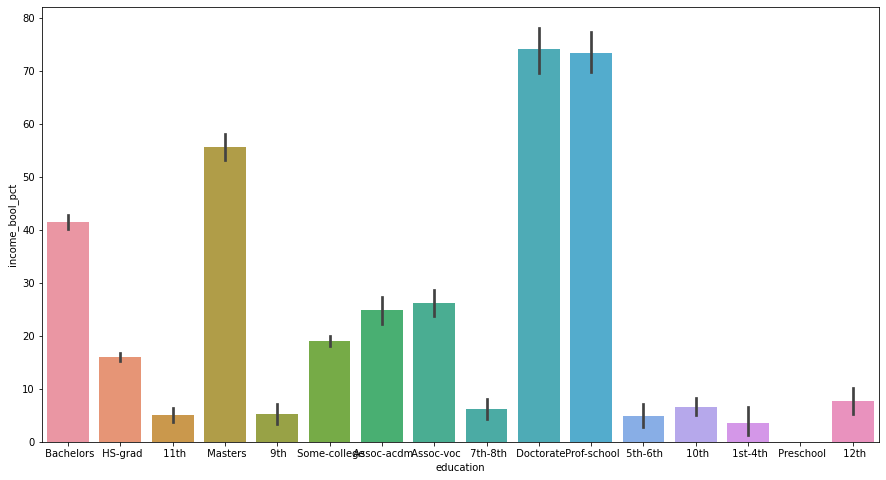

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='income_bool_pct',data=df)

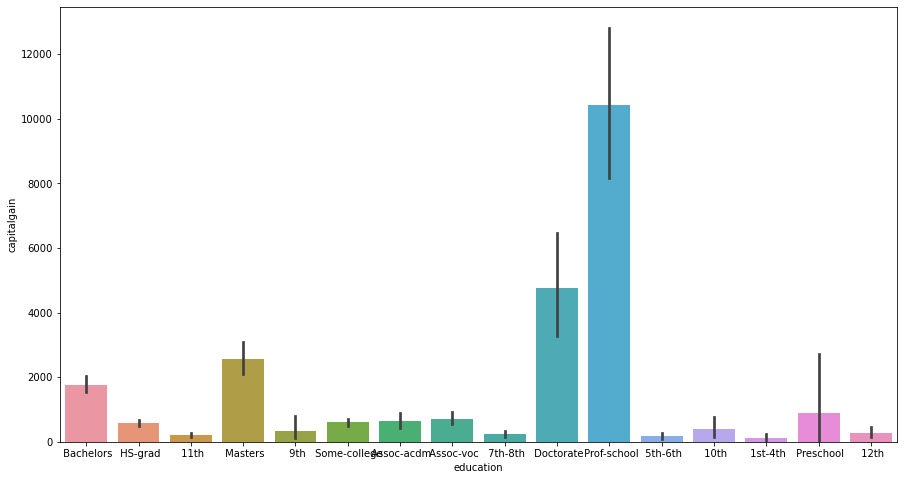

In [27]:
# The barplot below shows the distribution of capital gain by education. This could be useful in elucidating the 
# relationship between education and capital gain.
plt.figure(figsize=(15,8))
sns.barplot(x='education',y='capitalgain',data=df)

In [28]:
# The pairplot below can be useful because it shows visually how different variables are correlated with each other.
# As we can see, capital gain is positively correlated with income_bool_pct, which is what one would naively expect.
# We can also see that hours worked per week peaks with prime working age, and is lower on average for the youngest
# and oldest ages.
# It also appears that educationnum is positively correlated with income_bool_pct.

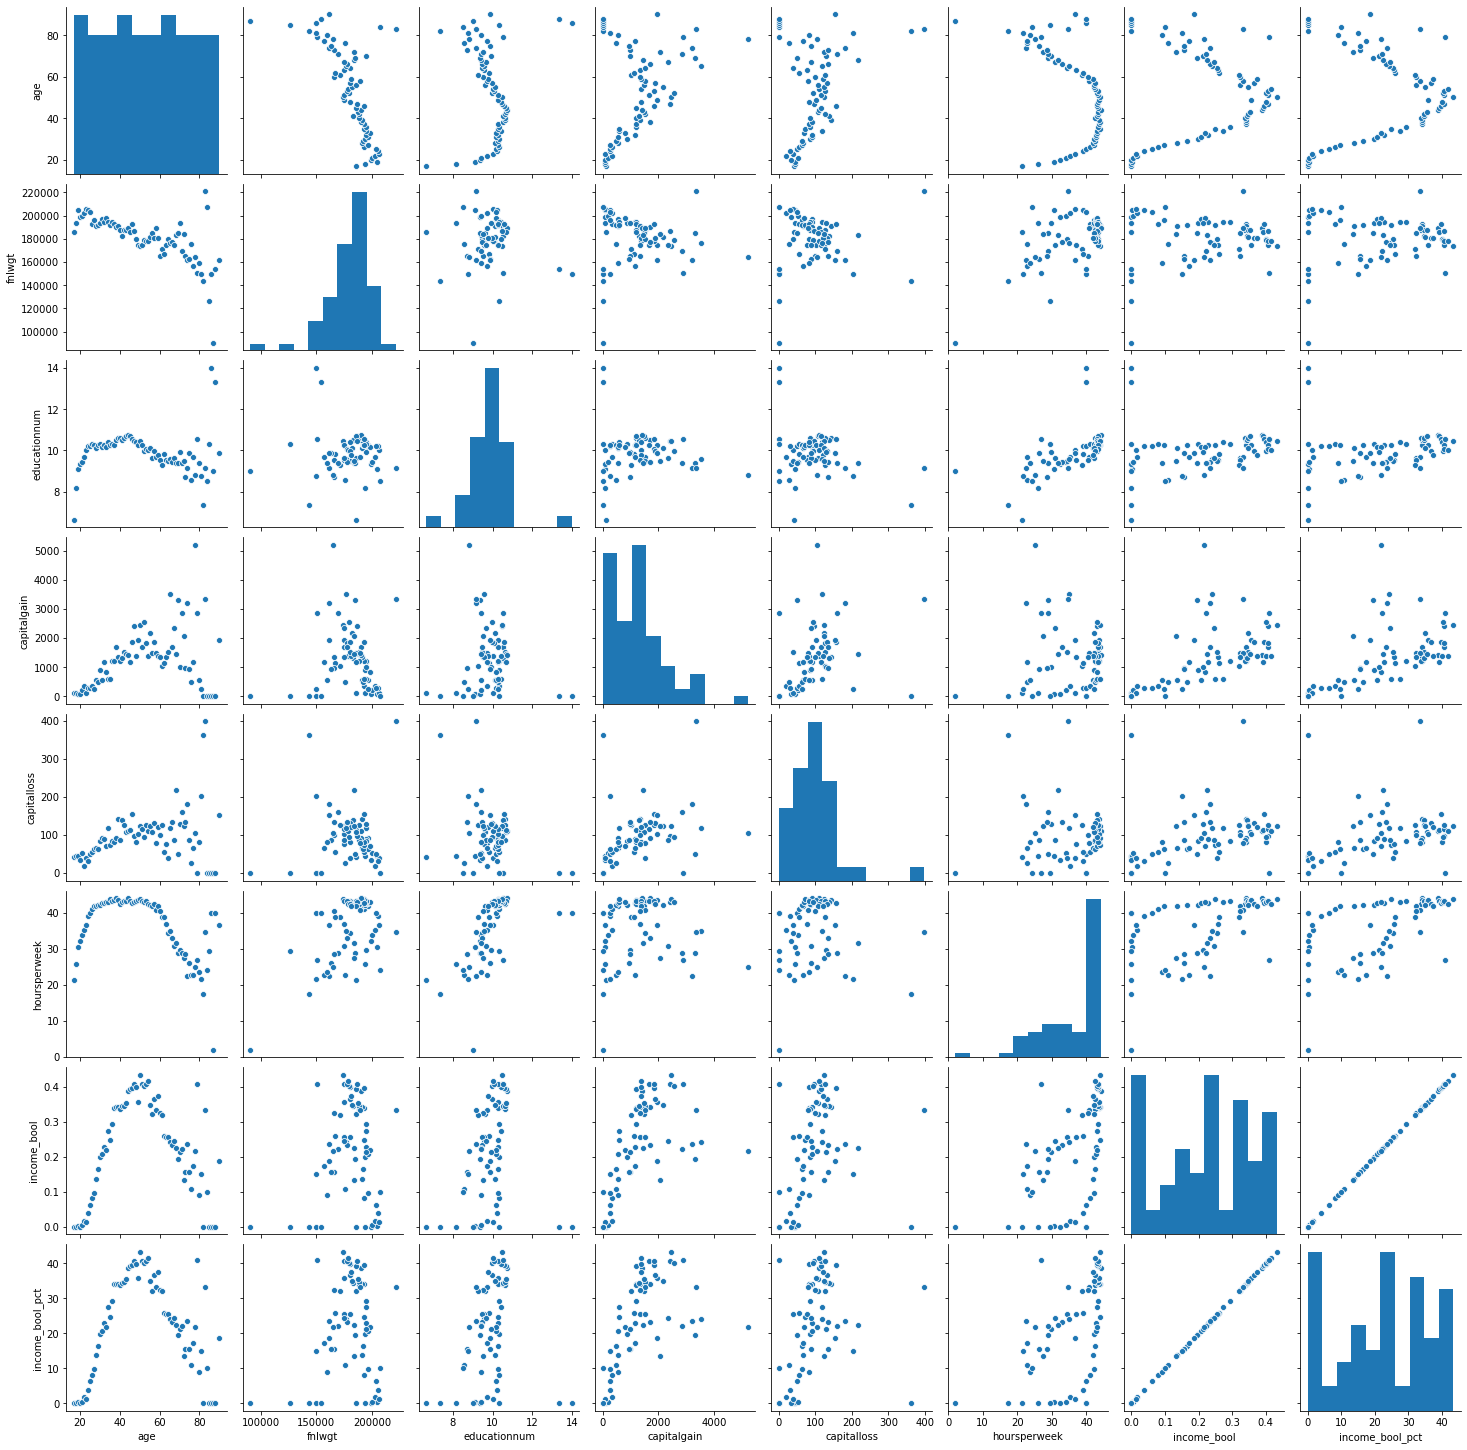

In [29]:
sns.pairplot(df2)

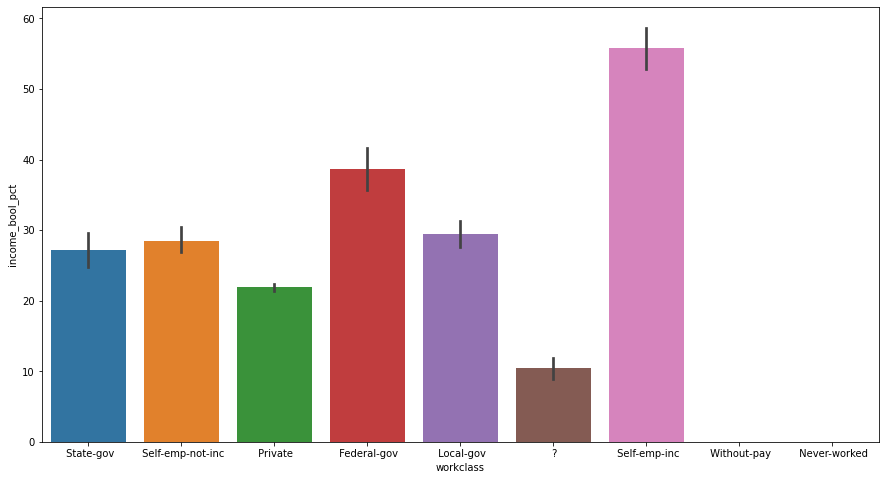

In [66]:
# In our examination of how the variable 'workclass' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='workclass',y='income_bool_pct',data=df)

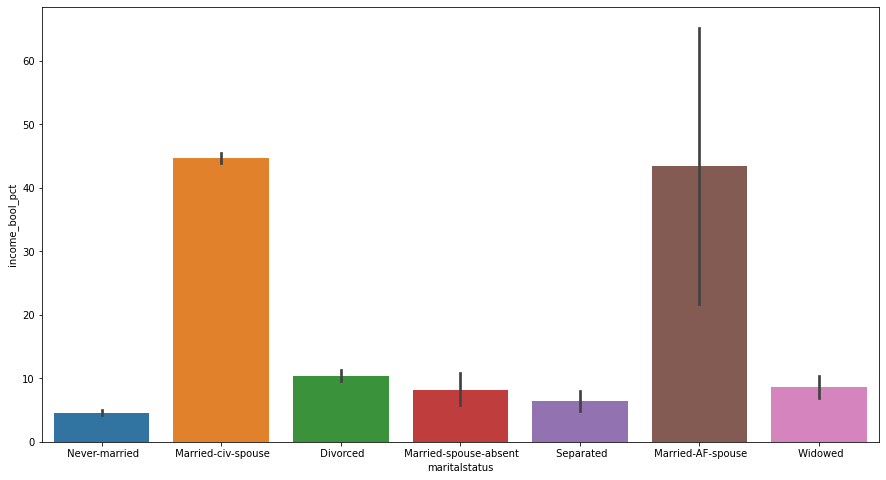

In [67]:
# In our examination of how the variable 'maritalstatus' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='maritalstatus',y='income_bool_pct',data=df)

In [34]:
# tried barplot of 'income' vs 'fnlwgt' but it took too long to load, likely because 'fnlwgt' has so many different values

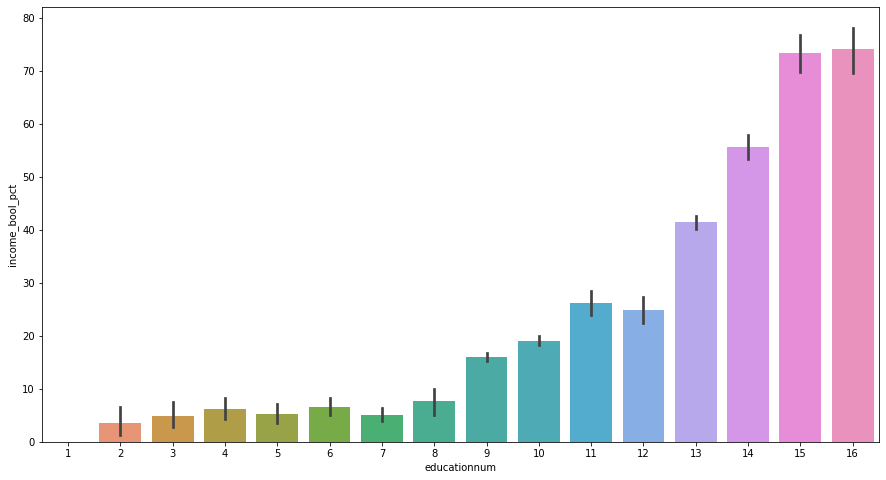

In [68]:
# In our examination of how the variable 'educationnum' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='educationnum',y='income_bool_pct',data=df)

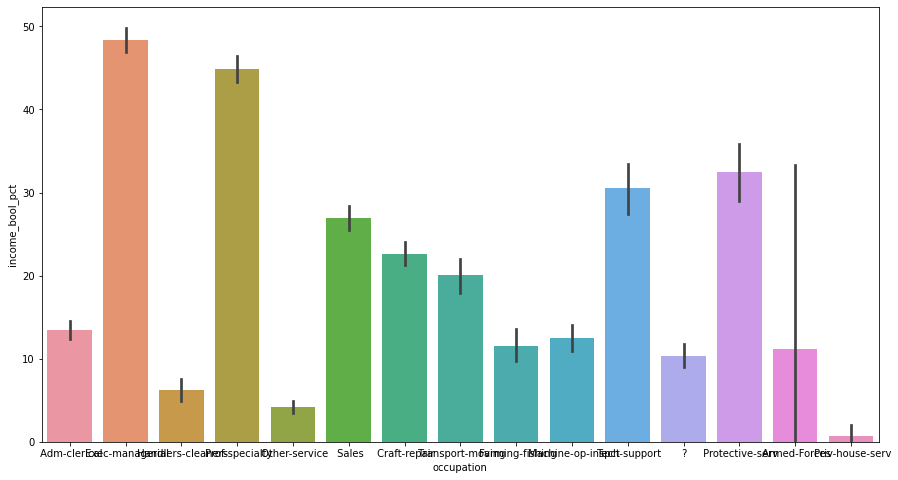

In [37]:
# In our examination of how the variable 'age' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='occupation',y='income_bool_pct',data=df)

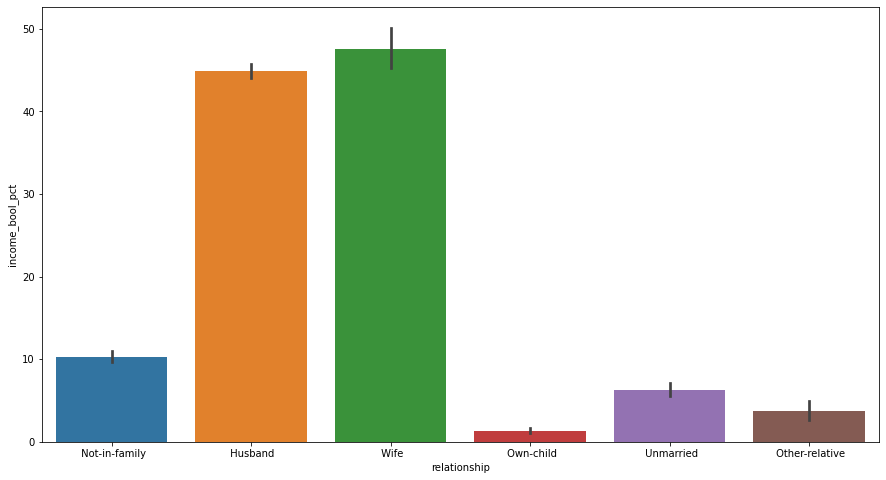

In [69]:
# In our examination of how the variable 'relationship' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='relationship',y='income_bool_pct',data=df)

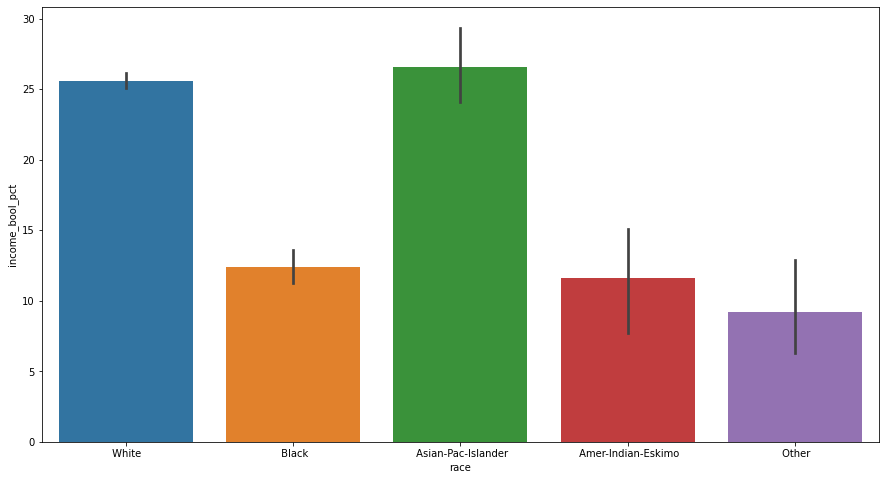

In [70]:
# In our examination of how the variable 'race' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='race',y='income_bool_pct',data=df)

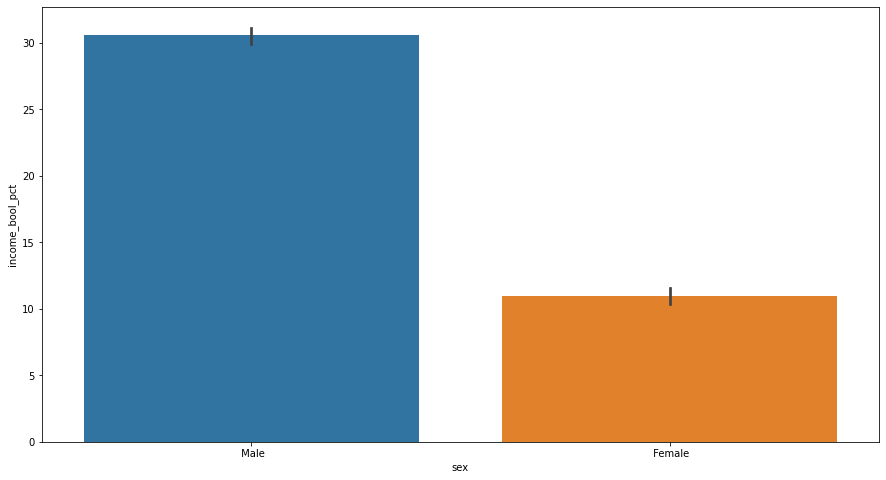

In [71]:
# In our examination of how the variable 'sex' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='sex',y='income_bool_pct',data=df)

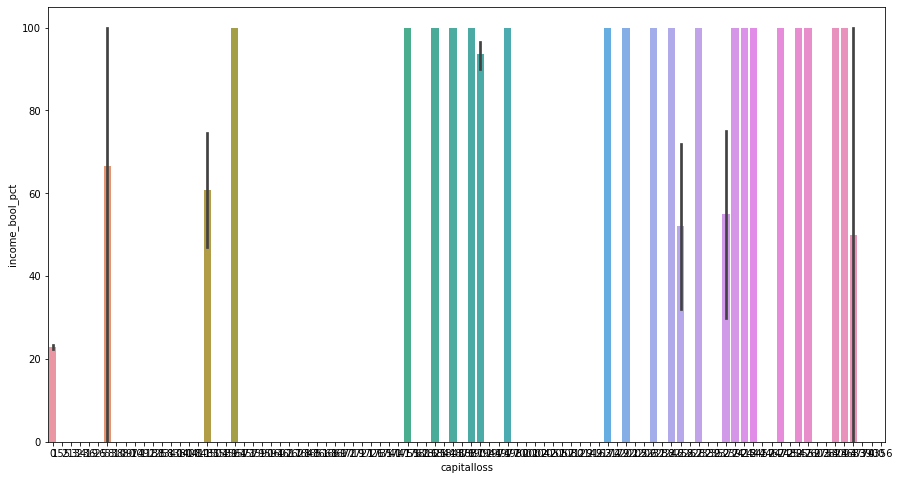

In [72]:
# In our examination of how the variable 'capitalloss' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='capitalloss',y='income_bool_pct',data=df)

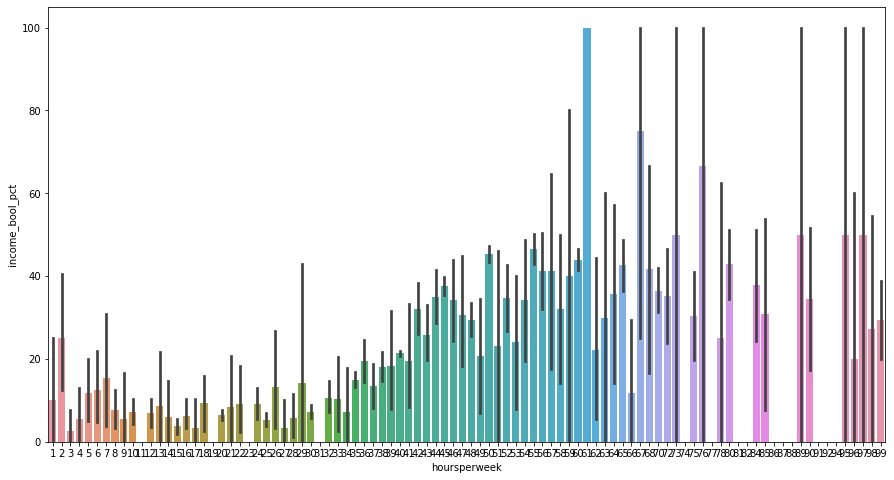

In [73]:
# In our examination of how the variable 'hoursperweek' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='hoursperweek',y='income_bool_pct',data=df)

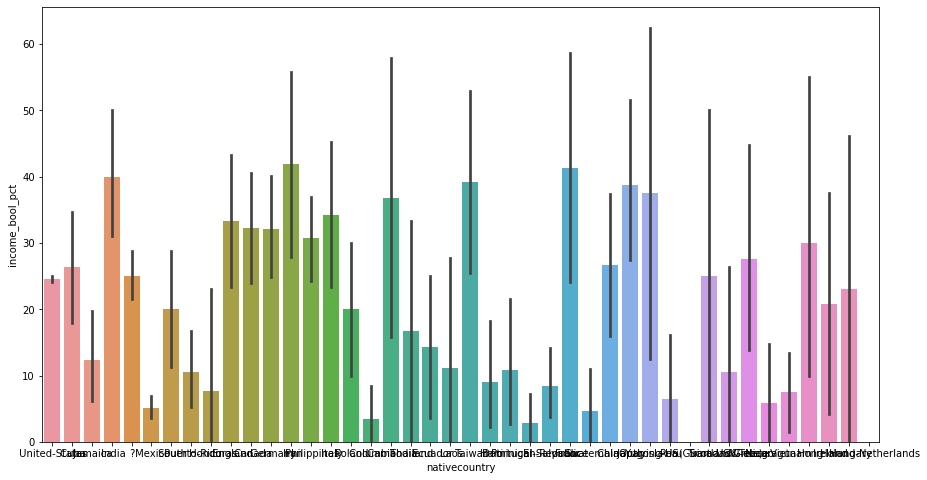

In [74]:
# In our examination of how the variable 'nativecountry' affects the variable 'income' the plot below could be useful because
# it shows how the % of people earning over 50k a year varies by age.
plt.figure(figsize=(15,8))
sns.barplot(x='nativecountry',y='income_bool_pct',data=df)

In [47]:
# A barplot of every variable vs income (as income_bool_pct) has been created above.
# Now, a histogram showing the distribution of values for each variable will be created:

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

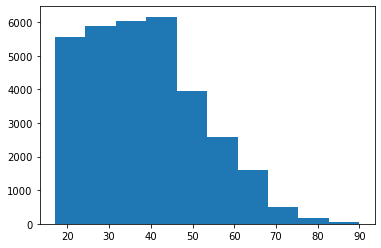

In [49]:
plt.hist('age',data=df)

(array([1.2980e+03, 2.5410e+03, 2.2696e+04, 9.6000e+02, 0.0000e+00,
        2.0930e+03, 1.8360e+03, 1.1160e+03, 1.4000e+01, 7.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

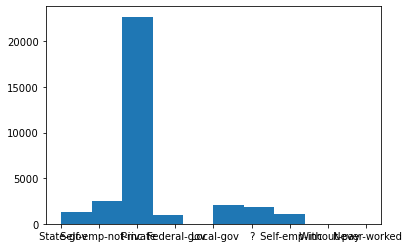

In [50]:
plt.hist('workclass',data=df)

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

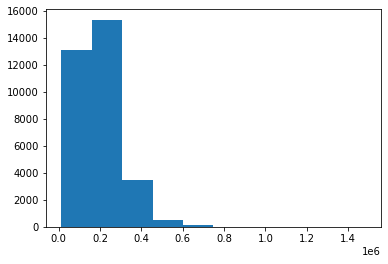

In [52]:
plt.hist('fnlwgt',data=df)

(array([15856.,  1175.,  2237.,  7291.,  2449.,   646.,   989.,   333.,
         1101.,   484.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

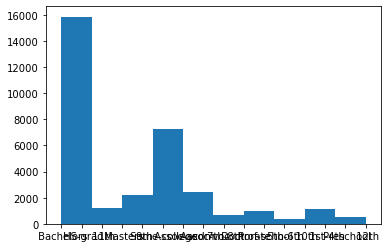

In [53]:
plt.hist('education',data=df)

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

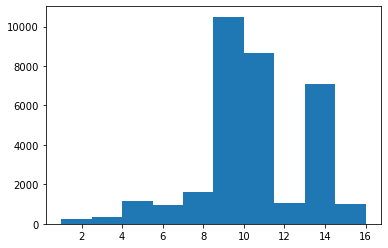

In [54]:
plt.hist('educationnum',data=df)

(array([10683., 14976.,     0.,  4443.,     0.,   418.,  1025.,     0.,
           23.,   993.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

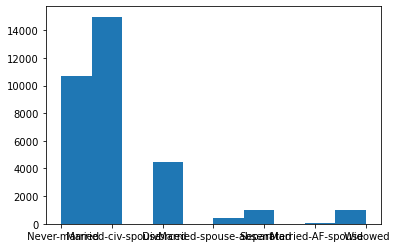

In [55]:
plt.hist('maritalstatus',data=df)

(array([7836., 1370., 7435., 3650., 4099., 2591., 2002., 2771.,  649.,
         158.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

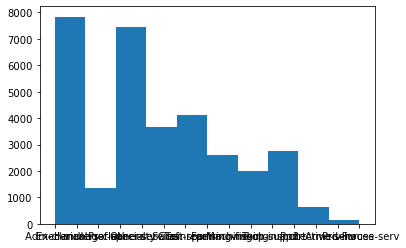

In [56]:
plt.hist('occupation',data=df)

(array([ 8305.,     0., 13193.,     0.,  1568.,     0.,  5068.,     0.,
         3446.,   981.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

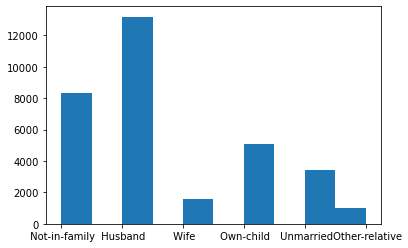

In [57]:
plt.hist('relationship',data=df)

(array([27816.,     0.,  3124.,     0.,     0.,  1039.,     0.,   311.,
            0.,   271.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

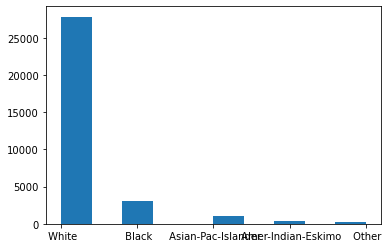

In [58]:
plt.hist('race',data=df)

(array([21790.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10771.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

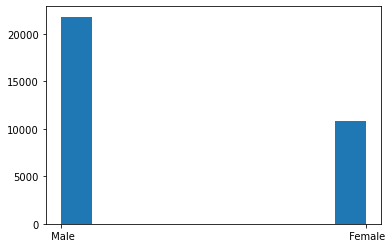

In [59]:
plt.hist('sex',data=df)

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

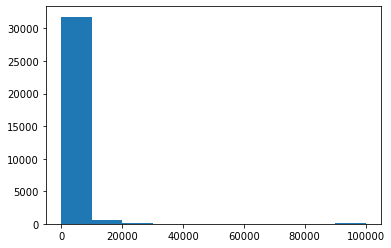

In [60]:
plt.hist('capitalgain',data=df)

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

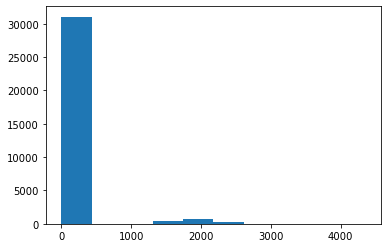

In [61]:
plt.hist('capitalloss',data=df)

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

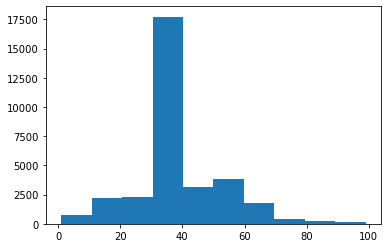

In [62]:
plt.hist('hoursperweek',data=df)

(array([30029.,   850.,   391.,   390.,    83.,   202.,   274.,   123.,
           94.,   125.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

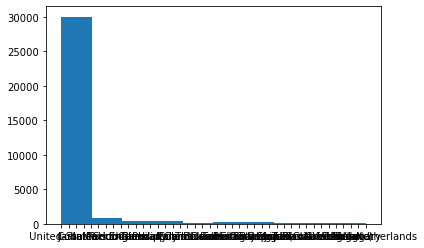

In [63]:
plt.hist('nativecountry',data=df)

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

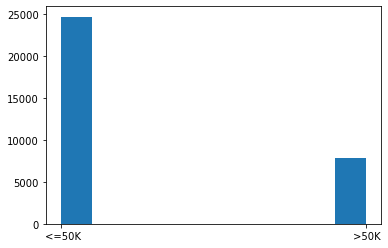

In [64]:
plt.hist('income',data=df)